In [1]:
import numpy as np
from pandas.io.json import json_normalize
from sklearn.model_selection import cross_validate, train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import pandas as pd
data1 = pd.read_csv('tripadvisor_european_restaurants.csv', low_memory = False)
#data.head()

In [3]:
data = data1.copy()
data.head(3)

,restaurant_link,restaurant_name,original_location,country,region,province,city,address,latitude,longitude,...,excellent,very_good,average,poor,terrible,food,service,value,atmosphere,keywords
0,g10001637-d10002227,Le 147,"[""Europe"", ""France"", ""Nouvelle-Aquitaine"", ""Ha...",France,Nouvelle-Aquitaine,Haute-Vienne,Saint-Jouvent,"10 Maison Neuve, 87510 Saint-Jouvent France",45.961674,1.169131,...,2.0,0.0,0.0,0.0,0.0,4.0,4.5,4.0,NaN,NaN
1,g10001637-d14975787,Le Saint Jouvent,"[""Europe"", ""France"", ""Nouvelle-Aquitaine"", ""Ha...",France,Nouvelle-Aquitaine,Haute-Vienne,Saint-Jouvent,"16 Place de l Eglise, 87510 Saint-Jouvent France",45.957040,1.205480,...,2.0,2.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2,g10002858-d4586832,Au Bout du Pont,"[""Europe"", ""France"", ""Centre-Val de Loire"", ""B...",France,Centre-Val de Loire,Berry,Rivarennes,"2 rue des Dames, 36800 Rivarennes France",46.635895,1.386133,...,3.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN


In [4]:
data.columns

Index(['restaurant_link', 'restaurant_name', 'original_location', 'country',
       'region', 'province', 'city', 'address', 'latitude', 'longitude',
       'claimed', 'awards', 'popularity_detailed', 'popularity_generic',
       'top_tags', 'price_level', 'price_range', 'meals', 'cuisines',
       'special_diets', 'features', 'vegetarian_friendly', 'vegan_options',
       'gluten_free', 'original_open_hours', 'open_days_per_week',
       'open_hours_per_week', 'working_shifts_per_week', 'avg_rating',
       'total_reviews_count', 'default_language',
       'reviews_count_in_default_language', 'excellent', 'very_good',
       'average', 'poor', 'terrible', 'food', 'service', 'value', 'atmosphere',
       'keywords'],
      dtype='object')

In [5]:
data.shape

(1083397, 42)

Text(0.5, 1.0, 'Number of restaurants per country')

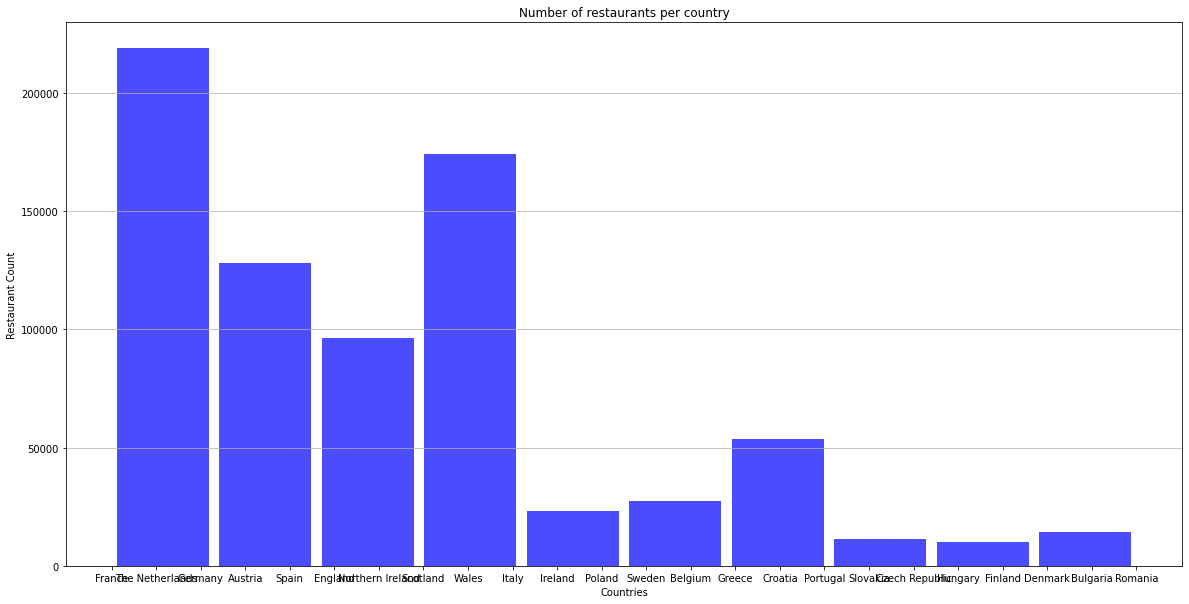

In [154]:
# customers['region'].hist()
plt.figure(figsize=(20,10)) 
n, bins, patches = plt.hist(x=(data['country']), color='blue',
                            alpha=0.7, rwidth=0.9)
plt.grid(axis='y', alpha=0.9)
plt.xlabel('Countries')
plt.ylabel('Restaurant Count')
plt.title('Number of restaurants per country')

# DATA CLEANING

    1.Drop column "popularity_generic" because its similar to "popularity_detailed". It only replaces 'Restaurants to eat' with 'Places to eat'. A place to eat can be taken to mean restaurant
    2. Drop "Original_location" column because where the restaurant originally started has little impact on its rating now. The current location is more important
    3. Over 25% of rows in the "price_level" columns are emmpty. There is no 3# and 2# ratings in the data

In [6]:
data['price_level'].isna().sum()/len(data)

0.2558665013840725

In [7]:
data['price_range'].value_counts(dropna = False)

NaN          779070
€10-€30        5937
€5-€15         5810
€10-€20        5148
€5-€20         4793
              ...  
€5-€2,242         1
€38-€63           1
€11-€113          1
€661-€862         1
€35-€180          1
Name: price_range, Length: 7299, dtype: int64

In [8]:
data['price_range'].isna().sum()/len(data)

0.7190992775501501

In [9]:
#data['city'].value_counts()

In [10]:
data['top_tags'].isna().sum()

110634

## Check restaurants with no ratings,  description and cuisines

In [11]:
restaurant_drop = data[(data['top_tags'].isna()) & (data['price_level'].isna())]
restaurant_drop.shape

(110617, 42)

In [12]:
data['top_tags'].value_counts(dropna = False)

NaN                                                            110634
Mid-range, French                                               20211
Mid-range                                                       19422
Cheap Eats                                                      15864
Mid-range, Italian                                              14363
                                                                ...  
Cheap Eats, Chinese, American, Asian                                1
Quick Bites, Chinese, Fast food, Sushi                              1
Bakeries, French, Spanish                                           1
Mid-range, International, Catalan, Vegetarian Friendly              1
Mid-range, Gastropub, Eastern European, Vegetarian Friendly         1
Name: top_tags, Length: 39963, dtype: int64

In [13]:
no_rating_restaurant = data[data['top_tags'].isna()]
no_rating_restaurant.shape

(110634, 42)

In [14]:
#pokemon_games = df.loc[df['Name'].str.contains("pokemon", case=False)]

## Its hard to fill out ratings without a description. These restaurants are a significant percentage of the data (10%). But even if i drop them, I still remain with enough sample data to build a recommender

In [15]:
len(no_rating_restaurant)/len(data)

0.10211769092954845

In [16]:
data = data[~data['top_tags'].isna()]
data.shape

(972763, 42)

## Remove bars and pubs

In [17]:
data = data[~data['top_tags'].str.contains('pub', case = False)]
data = data[~data['top_tags'].str.contains('bar', case = False)]
data.shape

(831905, 42)

## Remove restaurants with no Cuisine specified

In [18]:
print(data.shape)
data = data[data['cuisines'].notnull()]
data.shape

(831905, 42)


(774358, 42)

In [19]:
data['price_level'].isna().sum()

139834

In [20]:
# conditions = [
#     (df['Age'] < 20),
#     (df['Age'] >= 20) & (df['Age'] < 40),
#     (df['Age'] >= 40) & (df['Age'] < 59),
#     (df['Age'] >= 60)
# ]
# values = ['<20 years old', '20-39 years old', '40-59 years old', '60+ years old']
# df['Age Group'] = np.select(conditions, values)
# print(df)

In [21]:
data['price_level'].value_counts(dropna = False)

€€-€€€    421602
€         188360
NaN       139834
€€€€       24562
Name: price_level, dtype: int64

In [22]:
# Map Euro Counts to Numbers
# To be done before assigning Null values ratings. If done after, it will map all values that are not present
#in the mapping dictionary to NaN

data['price_level'] = data['price_level'].map({'€€-€€€':5,'€€€€':4,'€':1})
data['price_level'].value_counts(dropna = False)

5.0    421602
1.0    188360
NaN    139834
4.0     24562
Name: price_level, dtype: int64

In [23]:
# data = np.where(data['price_level'].isna(),label_rate(),data['price_level'])
# data['price_level'].isna().sum()
# data['price_level'] = data[data['price_level'].isna()].apply( data['cuisines'] : label_rate(data['cuisines']))

In [24]:
#data[data['price_level'] == 1]

In [25]:
rest_without_rating = data[(data['price_level'].isna()) & (~data['top_tags'].isna())]
rest_without_rating.shape

(139834, 42)

In [26]:
data['price_level'].value_counts(dropna = False)

5.0    421602
1.0    188360
NaN    139834
4.0     24562
Name: price_level, dtype: int64

In [27]:
#rest_without_rating.to_csv("E:\\SKUL\\PROGRAMMING_SKULS\\ironhack\\COURSE\\Final-Year-Project\\Final Data\\ratings.csv")

In [28]:
rest_without_rating['cuisines'].isna().sum()/len(rest_without_rating)

0.0

## Filling out ratings for restaurants without them
### Assumptions 
    1.Every restaurant with the tags 'french','italian','german', 'european','portuguese','american','international' cuisines is considered good and allocated a 3-Star rating
    2.Every restaurant with a cuisnine "Street food" is given a 1-Star rating

In [29]:
# Function for assigning a rating to the restaurants

three_star_labels = ['french','italian','german', 'european','portuguese','american','international','Japanese','Chinese']
one_start_labels = ['street food','pizza']
def label_rate(x):
    x = x.lower()
    if any(ext in x for ext in three_star_labels):
        return 3
    elif any(ext in x for ext in one_start_labels):
        return 1
    else:
        return 2      
    

In [30]:
# Get DF for restaurants without ratings but having cuisine types

rest_without_rating = rest_without_rating[~rest_without_rating['cuisines'].isna()]
rest_without_rating['price_level'] = rest_without_rating['cuisines'].apply(lambda x : label_rate(x))

In [31]:
#rest_without_rating.to_csv("E:\\SKUL\\PROGRAMMING_SKULS\\ironhack\\COURSE\\Final-Year-Project\\Final Data\\ratings.csv")
rest_without_rating['price_level'].isna().sum()

0

### Combine the two dataframes and fill the NaN in the original data with the assigned ratings
### After, delete the created dataframe to free up memory

In [32]:
#data.loc[rest_without_rating.index, :] = rest_without_rating[:]
data = data.combine_first(rest_without_rating)
del rest_without_rating

In [33]:
# Check if all NaN values have been filled out

print(data['price_level'].value_counts(dropna = False))
data['price_level'].isna().sum()

5.0    421602
1.0    198355
3.0     68170
2.0     61669
4.0     24562
Name: price_level, dtype: int64


0

In [34]:
#data.iloc[:1000].to_csv("E:\\SKUL\\PROGRAMMING_SKULS\\ironhack\\COURSE\\Final-Year-Project\\Final Data\\mydata.csv")

In [35]:
data.shape

(774358, 42)

# We have lost over 30% of our original data in this phase of data cleaning. I need a minimum of 500k restaurants

## Cleaning the meals column

In [36]:
data['meals'].isna().sum()/len(data)

0.39024843806094855

### About 39% of restaurants do not specify meal types
### We removed all pubs, bars and those serving only breakfast
### Safe to assume all our remaining restaurants atleast serve both lunch and dinner
### Fill all NaN in meals with Lunch, Dinner

In [37]:
data['meals'] = data['meals'].fillna('Lunch, Dinner')
data['meals'].isna().sum()

0

In [38]:
data['features'] = data['features'].astype(str)

## Fileter out restaurants that have won awards
### Over 73% of restaurants have never won an award
### Count Number of awards by counting the commas that appear in the string and add 1

In [39]:
round(data['awards'].isna().sum()/len(data),2)

0.73

In [40]:
data['awards'].isna().sum()

568207

In [41]:
data['awards'].dtypes

dtype('O')

In [42]:
def awards(x):    
    if x!= 0:
        x = str(x)
        return (x.count(",")+1)
    else:
        return 0

In [43]:
#ASK JAN WHY I CANT FILL NaN WITH 0
data['awards'].fillna(0, inplace = True)
data['awards'] = data['awards'].apply(lambda x: awards(x))
data['awards'].value_counts(dropna = False)

0     568207
2      40174
1      38247
3      34357
4      25068
5      19606
6      16858
7      12740
8       9143
9       5785
10      2909
11      1254
12        10
Name: awards, dtype: int64

In [44]:
len(data[data['awards'] == 0])
#.replace(np.nan, 0)

568207

In [45]:
data['awards'].isna().sum()

0

In [46]:
all_data = data[~data['original_open_hours'].isna()]
all_data.shape

(428762, 42)

## Encoding 'features' Column
## My PC ran out of memory when i attempted to use onehot Encoding

In [47]:
data['reservations'] = np.where(data['features'].str.contains("Reservations", case=False, na=False), 1, 0)
data['seating'] = np.where(data['features'].str.contains("Seating", case=False, na=False), 1, 0)
data['wheel_chair'] = np.where(data['features'].str.contains("Wheelchair Accessible", case=False, na=False), 1, 0)
data['alcohol'] = np.where(data['features'].str.contains("Serves Alcohol", case=False, na=False), 1, 0)
data['credit_cards'] = np.where(data['features'].str.contains("Accepts Credit Cards", case=False, na=False), 1, 0)
data['table_service'] = np.where(data['features'].str.contains("Table Service", case=False, na=False), 1, 0)
data['takeout'] = np.where(data['features'].str.contains("Takeout", case=False, na=False), 1, 0)
data['outdoor'] = np.where(data['features'].str.contains("Outdoor Seating", case=False, na=False), 1, 0)
data['delivery'] = np.where(data['features'].str.contains("Delivery", case=False, na=False), 1, 0)
data['wifi'] = np.where(data['features'].str.contains("Free Wifi", case=False, na=False), 1, 0)
data['highchair'] = np.where(data['features'].str.contains("Highchairs Available", case=False, na=False), 1, 0)
data['full_bar'] = np.where(data['features'].str.contains("Full Bar", case=False, na=False), 1, 0)
data['parking'] = np.where(data['features'].str.contains("Parking Available", case=False, na=False), 1, 0)
data['street_parking'] = np.where(data['features'].str.contains("Free off-street parking", case=False, na=False), 1, 0)

In [48]:
#numerical = data.select_dtypes(include = np.number)
#numerical.columns

## Encoding 'original_open_hours' column. Its a dictionary with keys (days of week) and value (open hours)

### Program reads it as a string. Convert values from string to a dictionary
### Assign all restaurants with no time specified uniform hours

In [49]:
#data['original_open_hours'].value_counts(dropna = False)

In [50]:
# Below is the most commonly occuring working hours 

"""
{"Mon": ["00:00-23:59"], "Tue": ["00:00-23:59"], "Wed": ["00:00-23:59"], "Thu": ["00:00-23:59"], 
 "Fri": ["00:00-23:59"], "Sat": ["00:00-23:59"], "Sun": ["00:00-23:59"]}
"""

'\n{"Mon": ["00:00-23:59"], "Tue": ["00:00-23:59"], "Wed": ["00:00-23:59"], "Thu": ["00:00-23:59"], \n "Fri": ["00:00-23:59"], "Sat": ["00:00-23:59"], "Sun": ["00:00-23:59"]}\n'

In [51]:
import ast
x = {"Mon": ["00:00-23:59"], "Tue": ["00:00-23:59"], "Wed": ["00:00-23:59"], "Thu": ["00:00-23:59"],"Fri": ["00:00-23:59"], "Sat": ["00:00-23:59"], "Sun": ["00:00-23:59"]}  
#x = {"Mon": ["09:00-14:30"], "Tue": ["09:00-14:30", "19:00-21:30"], "Wed": ["09:00-14:30", "19:00-21:30"], "Thu": ["09:00-14:30", "19:00-21:30"], "Fri": ["09:00-14:30", "19:00-22:00"], "Sat": ["09:00-14:30", "19:00-22:00"], "Sun": ["09:00-16:00"]}
x = str(x)
x = x.replace('""', "''")
def convert_dict(l):
    if l != 0:
      return ast.literal_eval(l)  
    else:       
        return ast.literal_eval(x)

In [52]:
data['original_open_hours'].fillna(0, inplace = True)
data['original_open_hours'] = data['original_open_hours'].apply(lambda l : convert_dict(l))

## Fill out 'open_days_per_week' and 'open_hours_per_week' columns based on values
## in the 'original_open_hours' column
## For the assigned hours and from data exploration, days_per_week = 7, hours_per_week = 84 and working shifts = 7

In [53]:
ll = {"Mon": ["00:00-23:59"], "Tue": ["00:00-23:59"], "Wed": ["00:00-23:59"], "Thu": ["00:00-23:59"],"Fri": ["00:00-23:59"], "Sat": ["00:00-23:59"], "Sun": ["00:00-23:59"]} 
data['open_days_per_week'] = np.where(data['original_open_hours'] == ll,7,data['open_days_per_week'])
data['open_days_per_week'].head()

0    7.0
2    7.0
3    7.0
4    7.0
5    7.0
Name: open_days_per_week, dtype: float64

In [54]:
data['open_hours_per_week'] = np.where(data['original_open_hours'] == ll,84,data['open_hours_per_week'])
data['open_hours_per_week'].head()

0    84.0
2    84.0
3    84.0
4    84.0
5    53.5
Name: open_hours_per_week, dtype: float64

In [55]:
data['working_shifts_per_week'] = np.where(data['original_open_hours'] == ll,7,data['working_shifts_per_week'])
data['working_shifts_per_week'].head()

0     7.0
2     7.0
3     7.0
4     7.0
5    12.0
Name: working_shifts_per_week, dtype: float64

In [56]:
#df = data[data['original_open_hours'] != 0]
#df['Mon'] = df['original_open_hours'].apply(lambda x : x['Mon'])

In [57]:
data['mon'] = data['original_open_hours'].apply(lambda x : x['Mon'])
data['tue'] = data['original_open_hours'].apply(lambda x : x['Tue'])
data['wed'] = data['original_open_hours'].apply(lambda x : x['Wed'])
data['thur'] = data['original_open_hours'].apply(lambda x : x['Thu'])
data['fri'] = data['original_open_hours'].apply(lambda x : x['Fri'])
data['sat'] = data['original_open_hours'].apply(lambda x : x['Sat'])
data['sun'] = data['original_open_hours'].apply(lambda x : x['Sun'])

In [58]:
data[['mon','tue','wed']].head()

,mon,tue,wed
0,[00:00-23:59],[00:00-23:59],[00:00-23:59]
2,[00:00-23:59],[00:00-23:59],[00:00-23:59]
3,[00:00-23:59],[00:00-23:59],[00:00-23:59]
4,[00:00-23:59],[00:00-23:59],[00:00-23:59]
5,[09:00-14:30],"[09:00-14:30, 19:00-21:30]","[09:00-14:30, 19:00-21:30]"


# Encoding 'default_language' column
## Using Web scrapping to get official languages of European countries from Wikipedia
## Assign restaurants the official country language of the countries where they are located
### Over 47,000 restaurants are not assigned a language 

In [59]:
data['default_language'].value_counts(dropna = False)

English          522125
All languages    204381
NaN               47852
Name: default_language, dtype: int64

In [60]:
import requests
from bs4 import BeautifulSoup


In [61]:
uri = 'https://en.wikipedia.org/wiki/Languages_of_the_European_Union'
response = requests.get(uri)
soup = BeautifulSoup(response.content, 'html.parser')
#soup

In [62]:
countries = []
languages = []
for i in range(3,27):
    language  =(soup.select("#mw-content-text > div.mw-parser-output > table:nth-child(16) > tbody > tr:nth-child(" + str(i) + ") > td:nth-child(1) > a")[0].text)
    country = soup.select("#mw-content-text > div.mw-parser-output > table:nth-child(16) > tbody > tr:nth-child(" + str(i) + ") > td:nth-child(2)")[0].text.replace('\n','')
    #count = len(country.split()) --> DOES NOT WORK. SOME COUNTRIES HAVE DOUBLE SPACES
    count = country.count(' ')   
    if count > 1 and 'Czech' not in country:
        countries.append(country.split())
        languages.append(language)
    else:
        languages.append(language)
        countries.append(country)


In [63]:
print(languages)
print(countries)

['Bulgarian', 'Croatian', 'Czech', 'Danish', 'Dutch', 'English', 'Estonian', 'Finnish', 'French', 'German', 'Greek', 'Hungarian', 'Irish', 'Italian', 'Latvian', 'Lithuanian', 'Maltese', 'Polish', 'Portuguese', 'Romanian', 'Slovak', 'Slovene', 'Spanish', 'Swedish']
['Bulgaria', 'Croatia', 'Czech Republic', 'Denmark', ['Belgium', 'Netherlands'], ['Ireland', 'Malta'], 'Estonia', 'Finland', ['Belgium', 'France', 'Luxembourg'], ['Austria', 'Belgium', 'Germany', 'Luxembourg'], ['Cyprus', 'Greece'], 'Hungary', 'Ireland', 'Italy', 'Latvia', 'Lithuania', 'Malta', 'Poland', 'Portugal', 'Romania', 'Slovakia', 'Slovenia', 'Spain', ['Sweden', 'Finland']]


## Cleaning the lists
### There are languages spoken by multiple countries
###  Belgium and Finland have more than one official language
### Countries that appear more than twice are assigned the last instance where they appear (Ireland & Malta)

In [64]:
countries_and_languages = {}
for country in countries:
    for language in languages:
        if isinstance(country, list) == True:
            for i in range(len(country)):
                countries_and_languages[country[i]] = language
            languages.remove(language)
            break
            
        else:
            countries_and_languages[country] = language
            languages.remove(language)
            break
        

### The UK, Scotland, Wales and Northern Ireland are not part of the European Union but i want to include them in recommender
### Fortunately, they all speak the same language. Will append them to the language dictionary

In [65]:
uk_countries = ['England','Scotland','Wales','Northern Ireland']
for country in uk_countries:
    countries_and_languages[country] = 'English'
countries_and_languages

{'Bulgaria': 'Bulgarian',
 'Croatia': 'Croatian',
 'Czech Republic': 'Czech',
 'Denmark': 'Danish',
 'Belgium': 'German',
 'Netherlands': 'Dutch',
 'Ireland': 'Irish',
 'Malta': 'Maltese',
 'Estonia': 'Estonian',
 'Finland': 'Swedish',
 'France': 'French',
 'Luxembourg': 'German',
 'Austria': 'German',
 'Germany': 'German',
 'Cyprus': 'Greek',
 'Greece': 'Greek',
 'Hungary': 'Hungarian',
 'Italy': 'Italian',
 'Latvia': 'Latvian',
 'Lithuania': 'Lithuanian',
 'Poland': 'Polish',
 'Portugal': 'Portuguese',
 'Romania': 'Romanian',
 'Slovakia': 'Slovak',
 'Slovenia': 'Slovene',
 'Spain': 'Spanish',
 'Sweden': 'Swedish',
 'England': 'English',
 'Scotland': 'English',
 'Wales': 'English',
 'Northern Ireland': 'English'}

### I am populating a column based on values of another column
### Create a new dataframe, fill the NaN in 'default_language' column based on values in the 'country' column
### There are no NaNs in the 'country' column

In [66]:
# Check for NaN in 'country' column
display(data['country'].isna().sum())
country_data = data[data['default_language'].isna()]
len(country_data)

0

47852

In [67]:
def clean_country(x):
    if x == 'The Netherlands':
        return 'Netherlands'
    else:
        return x

In [68]:
country_data['country'] = country_data['country'].apply(lambda x : clean_country(x))
country_data['country'].value_counts(dropna = False)

C:\Users\KIMERA\AppData\Local\Temp/ipykernel_5292/3065780036.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_data['country'] = country_data['country'].apply(lambda x : clean_country(x))


Spain               7631
Italy               7239
France              5549
Germany             5410
England             5153
Poland              2130
Portugal            2085
Greece              1959
Netherlands         1428
Czech Republic      1218
Austria             1128
Romania             1085
Belgium             1067
Sweden               830
Hungary              494
Finland              492
Ireland              491
Denmark              465
Bulgaria             450
Slovakia             422
Scotland             405
Croatia              355
Wales                244
Northern Ireland     122
Name: country, dtype: int64

In [69]:
def languages(x):
    #x = str(x)
    return countries_and_languages[x]

In [70]:
country_data['default_language'] = country_data['country'].apply(lambda x : countries_and_languages[x])

C:\Users\KIMERA\AppData\Local\Temp/ipykernel_5292/3434592492.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_data['default_language'] = country_data['country'].apply(lambda x : countries_and_languages[x])


In [71]:
country_data['default_language'].value_counts(dropna = False)

Spanish       7631
German        7605
Italian       7239
English       5924
French        5549
Polish        2130
Portuguese    2085
Greek         1959
Dutch         1428
Swedish       1322
Czech         1218
Romanian      1085
Hungarian      494
Irish          491
Danish         465
Bulgarian      450
Slovak         422
Croatian       355
Name: default_language, dtype: int64

### Merge the two dataframes 
### After, delete the 'country_data' dataframe o save memory

In [72]:
data = data.combine_first(country_data)
len(data[data['default_language'].isna()])

0

In [73]:
del country_data

## Cleaning the Average rating column
### Only 6% of restaurants do not have ratings
### Its small enough to be filled with the mean value

In [74]:
data['avg_rating'].isna().sum()/len(data)

0.06321107291459506

In [75]:
data['avg_rating'].fillna(np.mean(data['avg_rating']), inplace = True)
data['avg_rating'].isna().sum()/len(data)

0.0

## Check for NaN in the various reviews columns
### All columns have the same percentage of NaN values (6%)
### It is assumed that these restaurants have just not received any reviews

In [76]:
reviews_df = data[['reviews_count_in_default_language','excellent','very_good','average','poor','terrible']]
round(reviews_df.isna().sum()/len(data),2)

reviews_count_in_default_language    0.06
excellent                            0.06
very_good                            0.06
average                              0.06
poor                                 0.06
terrible                             0.06
dtype: float64

In [77]:
# DELETE DATAFRAME TO SAVE MEMORY
del reviews_df

## Processing Vegan Options

In [78]:
vegans_columns = ['vegetarian_friendly','vegan_options','gluten_free']
for col in vegans_columns:
    data[col] = data[col].map({'Y':1,'N':0})


In [79]:

data['vegan_options'].value_counts(dropna = False)

0    661754
1    112604
Name: vegan_options, dtype: int64

In [80]:
data['gluten_free'].value_counts(dropna = False)

0    678507
1     95851
Name: gluten_free, dtype: int64

In [81]:
data['vegetarian_friendly'].value_counts(dropna = False)

0    508622
1    265736
Name: vegetarian_friendly, dtype: int64

## Process the Claimed Column
### Claimed - Restaurant owners manages the account, post new content and respond to reviews
### Unclaimed - The account is unmanaged and reviews do not get responses
### Over 52.8% of restaurants are unclaimed

In [82]:
unclaimed_perc = len(data[data['claimed'] == 'Unclaimed'])/len(data)
unclaimed_perc

0.528628877082693

In [83]:
data['claimed'] = data['claimed'].map({'Claimed':1,'Unclaimed':0})
data['claimed'].value_counts(dropna = False)

0    409348
1    365010
Name: claimed, dtype: int64

In [84]:
#data.iloc[:1000].to_csv("E:\\SKUL\\PROGRAMMING_SKULS\\ironhack\\COURSE\\Final-Year-Project\\Final Data\\mydata.csv")

In [85]:
data['price_range'].dtypes

dtype('O')

# USING MACHINE LEARNING
## Applying Linear Regression to predict and fillout the missing values in the 'lower_limit' column

In [86]:
# REPLACE THE EUROS SIGN
data['price_range'] = data['price_range'].str.replace('€','')
data['price_range'].iloc[:10]

0       NaN
2       NaN
3       NaN
4       NaN
5     14-29
6      8-17
7     10-35
8     12-26
10      NaN
11      NaN
Name: price_range, dtype: object

In [87]:
# GET THE LOWER LIMIT
data['lower_limit'] = data['price_range'].apply(lambda x : str(x).split('-')[0])
data['lower_limit'].head(10)

0     nan
2     nan
3     nan
4     nan
5      14
6       8
7      10
8      12
10    nan
11    nan
Name: lower_limit, dtype: object

## Switzerland doesnot use EUROS. Swiss use Swiss Francs
### Processing the swiss francs

In [88]:
def swiss_francs(x):
    y = str(x)
    if 'CHF' in y:
        # Keep the last two characters on the string
        m = y[-2:]
        #m = y.replace("CHF"+"\\xa","")
        z = int(m) * 0.96
        return z
    else:
        return y
data['lower_limit'] = data['lower_limit'].apply(lambda x: swiss_francs(x))
data['lower_limit'] = data['lower_limit'].apply(lambda x: str(x).replace(",",""))
data['lower_limit'] = data['lower_limit'].astype(float).round(2)

### Convert 'nan' back to proper NaN => Its just a text

In [89]:
data['lower_limit'] = data['lower_limit'].replace('nan',np.nan)
data['lower_limit'].head(7)

0     NaN
2     NaN
3     NaN
4     NaN
5    14.0
6     8.0
7    10.0
Name: lower_limit, dtype: float64

In [90]:
data['lower_limit'].isna().sum()

530295

In [91]:
data['lower_limit'].value_counts()

5.0       26766
10.0      25050
2.0       22750
3.0       20751
6.0       15319
          ...  
1390.0        1
583.0         1
743.0         1
1212.0        1
174.0         1
Name: lower_limit, Length: 371, dtype: int64

In [92]:
data['lower_limit'].dtypes

dtype('float64')

In [93]:
#some are empty. Others have more than one range 
# count = 0
# new_list = []
# for item in my_list:
#     if len(item) > 1:
#         count += 1
#     elif len(item)==1:
#         new_list.append(item[0])
    
# print(count)
# print("PERCENTAGE: ", count/len(my_list))
# #print(my_list)

In [94]:
#new_list

## PROCESSING OPENING AND CLOSING TIMES

In [95]:
# FUNCTION FOR OPEN TIME
def clean_time(x):
    if len(x) >= 1:
        y = x[0]
        z = str(y).split("-")[0][:2]
        return z
    else:
        return 0

# FUNCTION FOR CLOSE TIME
def clean_time_close(x):
    if len(x) == 1:
        y = x[0]
        z = str(y).split("-")[1][:2]
        #str(x[1]).split("-")[1][:2]
        return z
    elif len(x) > 1:
        # GET LAST ELEMENT OF LIST
        y = list(x)
        z = str(y[-1]).split("-")[1][:2]
        return z
       
    else:
        return 0       

In [96]:
col_process_list = ['mon','tue','wed','thur','fri','sat','sun']
for col in col_process_list:
    new_col = col+'_open'
    new_col_close = col+'_close'
    #print(new_col)
    #data_copy[new_col] = data_copy[col].apply(lambda x: clean_time_close(x))
    data[new_col] = data[col].apply(lambda x: clean_time(x)).astype(int)
    
    #print(new_col)
    data[new_col_close] = data[col].apply(lambda x: clean_time_close(x)).astype(int)

In [97]:
# DROP ORIGINAL COLUMNS
data = data.drop(col_process_list, axis = 1)

In [98]:
data.columns

Index(['restaurant_link', 'restaurant_name', 'original_location', 'country',
       'region', 'province', 'city', 'address', 'latitude', 'longitude',
       'claimed', 'awards', 'popularity_detailed', 'popularity_generic',
       'top_tags', 'price_level', 'price_range', 'meals', 'cuisines',
       'special_diets', 'features', 'vegetarian_friendly', 'vegan_options',
       'gluten_free', 'original_open_hours', 'open_days_per_week',
       'open_hours_per_week', 'working_shifts_per_week', 'avg_rating',
       'total_reviews_count', 'default_language',
       'reviews_count_in_default_language', 'excellent', 'very_good',
       'average', 'poor', 'terrible', 'food', 'service', 'value', 'atmosphere',
       'keywords', 'reservations', 'seating', 'wheel_chair', 'alcohol',
       'credit_cards', 'table_service', 'takeout', 'outdoor', 'delivery',
       'wifi', 'highchair', 'full_bar', 'parking', 'street_parking',
       'lower_limit', 'mon_open', 'mon_close', 'tue_open', 'tue_close',
      

In [99]:
data['mon_close'][data['mon_close'] == '00'].head(10)

Series([], Name: mon_close, dtype: int32)

In [100]:
data['mon_open'].head()

0    0
2    0
3    0
4    0
5    9
Name: mon_open, dtype: int32

In [101]:
data['mon_close'].head()

0    23
2    23
3    23
4    23
5    14
Name: mon_close, dtype: int32

# MACHINE LEARNING
## Training a model on the dataframe where the lower_limit column value is given
## Use the model to predict the values in lower_limit column

## Get dataframe where price_level is not NaN (ml_df)
### Only 31.5% of values are given 
### 244k rows are enough to train the model

In [102]:
ml_df = data[~data['lower_limit'].isna()]
ml_df.shape

(244063, 71)

In [103]:
len(ml_df)/len(data)

0.31518109194971833

## Get Numerical columns and treat NaN
### Delete the ml_df to save memory

In [104]:
numerical = ml_df.select_dtypes(include = np.number)
numerical.head()

,latitude,longitude,claimed,awards,price_level,vegetarian_friendly,vegan_options,gluten_free,open_days_per_week,open_hours_per_week,...,wed_open,wed_close,thur_open,thur_close,fri_open,fri_close,sat_open,sat_close,sun_open,sun_close
5,46.169823,3.855819,1,2,5.0,0,0,0,7.0,53.5,...,9,21,9,21,9,22,9,22,9,16
6,44.233078,4.251449,1,0,5.0,0,0,0,5.0,30.0,...,12,22,12,22,12,22,12,22,12,22
7,43.360023,2.219851,1,5,5.0,1,0,0,6.0,24.0,...,10,14,10,14,10,14,10,14,10,14
8,42.934000,0.936559,1,0,5.0,0,0,0,5.0,14.0,...,12,14,12,14,12,21,19,21,12,21
14,43.315163,6.076051,1,0,5.0,0,0,0,6.0,20.5,...,11,14,11,14,11,21,11,21,11,14


In [105]:
del ml_df

In [106]:
all_cols = round(numerical.isna().sum()/len(numerical),2)* 100
all_cols

latitude                              1.0
longitude                             1.0
claimed                               0.0
awards                                0.0
price_level                           0.0
vegetarian_friendly                   0.0
vegan_options                         0.0
gluten_free                           0.0
open_days_per_week                    0.0
open_hours_per_week                   0.0
working_shifts_per_week               0.0
avg_rating                            0.0
total_reviews_count                   4.0
reviews_count_in_default_language     8.0
excellent                             8.0
very_good                             8.0
average                               8.0
poor                                  8.0
terrible                              8.0
food                                 38.0
service                              37.0
value                                38.0
atmosphere                           73.0
reservations                      

## Drop columns that have over 30% NaN

In [107]:
cols_with_high_perc = ['food','service','value','atmosphere']
numerical = numerical.drop(cols_with_high_perc, axis =1)

In [108]:
df = pd.DataFrame(all_cols)
df.head()

,0
latitude,1.0
longitude,1.0
claimed,0.0
awards,0.0
price_level,0.0


In [109]:
round(numerical.isna().sum()/len(numerical),2)* 100

latitude                             1.0
longitude                            1.0
claimed                              0.0
awards                               0.0
price_level                          0.0
vegetarian_friendly                  0.0
vegan_options                        0.0
gluten_free                          0.0
open_days_per_week                   0.0
open_hours_per_week                  0.0
working_shifts_per_week              0.0
avg_rating                           0.0
total_reviews_count                  4.0
reviews_count_in_default_language    8.0
excellent                            8.0
very_good                            8.0
average                              8.0
poor                                 8.0
terrible                             8.0
reservations                         0.0
seating                              0.0
wheel_chair                          0.0
alcohol                              0.0
credit_cards                         0.0
table_service   

## REPLACE ALL NaN WITH ZERO

In [110]:
numerical.fillna(0, inplace = True)
numerical.isna().sum()

latitude                             0
longitude                            0
claimed                              0
awards                               0
price_level                          0
vegetarian_friendly                  0
vegan_options                        0
gluten_free                          0
open_days_per_week                   0
open_hours_per_week                  0
working_shifts_per_week              0
avg_rating                           0
total_reviews_count                  0
reviews_count_in_default_language    0
excellent                            0
very_good                            0
average                              0
poor                                 0
terrible                             0
reservations                         0
seating                              0
wheel_chair                          0
alcohol                              0
credit_cards                         0
table_service                        0
takeout                  

In [147]:
## CHECK CORELLATION
correlations_matrix = numerical.corr()
correlations_matrix

,latitude,longitude,claimed,awards,price_level,vegetarian_friendly,vegan_options,gluten_free,open_days_per_week,open_hours_per_week,...,wed_open,wed_close,thur_open,thur_close,fri_open,fri_close,sat_open,sat_close,sun_open,sun_close
latitude,1.000000,0.118269,0.019836,0.015015,-0.009239,0.072373,0.043871,0.023452,-0.042177,-0.085878,...,0.073430,0.082231,0.072009,0.088897,0.069824,0.079926,0.062730,0.064237,0.021794,0.017589
longitude,0.118269,1.000000,-0.024533,-0.041617,-0.075191,-0.011456,-0.051613,-0.071896,0.065908,0.098578,...,-0.027299,-0.021166,-0.035087,-0.034636,-0.034813,-0.027562,-0.030816,-0.022634,-0.001791,0.018866
claimed,0.019836,-0.024533,1.000000,0.256550,0.106097,0.287187,0.209320,0.216870,-0.238693,-0.304596,...,0.461081,-0.224557,0.496552,-0.205278,0.516698,-0.198896,0.495900,-0.206212,0.401260,-0.257720
awards,0.015015,-0.041617,0.256550,1.000000,0.147894,0.479397,0.437897,0.545056,-0.117590,-0.231535,...,0.228580,-0.083966,0.255440,-0.055165,0.267967,-0.032746,0.270107,-0.014785,0.196557,-0.084295
price_level,-0.009239,-0.075191,0.106097,0.147894,1.000000,0.130575,0.082239,0.153331,-0.046720,-0.081811,...,0.090913,-0.040528,0.109078,-0.022582,0.117295,-0.016952,0.124431,0.004390,0.103636,0.014986
vegetarian_friendly,0.072373,-0.011456,0.287187,0.479397,0.130575,1.000000,0.598551,0.510182,-0.079116,-0.174723,...,0.273783,-0.097050,0.294324,-0.085017,0.302861,-0.080667,0.300501,-0.064655,0.257617,-0.077150
vegan_options,0.043871,-0.051613,0.209320,0.437897,0.082239,0.598551,1.000000,0.566927,-0.045008,-0.117541,...,0.208773,-0.067352,0.218929,-0.063120,0.222784,-0.064101,0.219691,-0.050987,0.192890,-0.061645
gluten_free,0.023452,-0.071896,0.216870,0.545056,0.153331,0.510182,0.566927,1.000000,-0.060247,-0.144291,...,0.202446,-0.073131,0.218744,-0.062647,0.225789,-0.056718,0.224032,-0.036279,0.194467,-0.043952
open_days_per_week,-0.042177,0.065908,-0.238693,-0.117590,-0.046720,-0.079116,-0.045008,-0.060247,1.000000,0.604350,...,-0.073031,0.380762,-0.185355,0.289903,-0.300220,0.166151,-0.258979,0.194344,-0.025105,0.383182
open_hours_per_week,-0.085878,0.098578,-0.304596,-0.231535,-0.081811,-0.174723,-0.117541,-0.144291,0.604350,1.000000,...,-0.469501,0.171005,-0.557317,0.091687,-0.618105,0.016833,-0.569750,0.050227,-0.348036,0.244818


<AxesSubplot:>

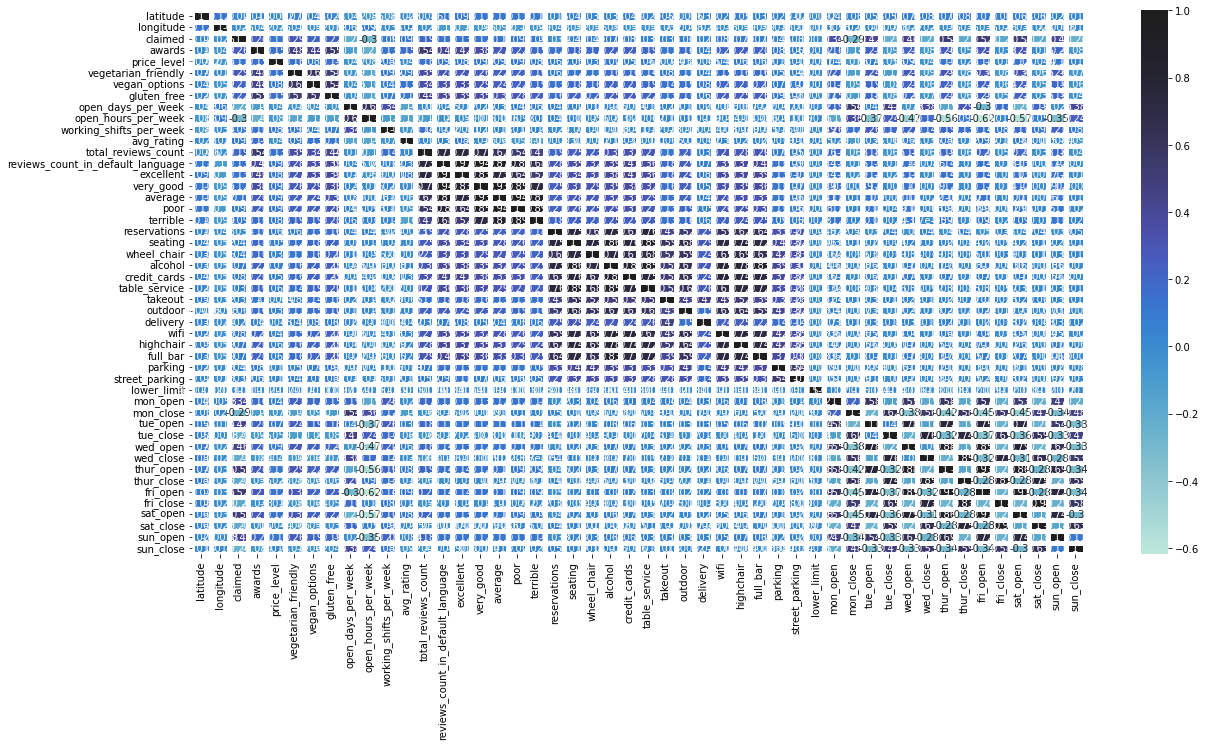

In [148]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(20,10))         # Sample figsize in inches
sns.heatmap(correlations_matrix, ax=ax, linewidth=3.1,annot=True,center=1)

# Too many columns

## Normalize the Data

In [111]:
from sklearn.preprocessing import MinMaxScaler
kimera = MinMaxScaler().fit(numerical)
numerical_normalized = kimera.transform(numerical)
print(numerical_normalized.shape)
numerical_normalized = pd.DataFrame(numerical_normalized,columns=numerical.columns)
numerical_normalized.head()

(244063, 48)


,latitude,longitude,claimed,awards,price_level,vegetarian_friendly,vegan_options,gluten_free,open_days_per_week,open_hours_per_week,...,wed_open,wed_close,thur_open,thur_close,fri_open,fri_close,sat_open,sat_close,sun_open,sun_close
0,0.660261,0.734889,1.0,0.166667,1.0,0.0,0.0,0.0,1.000000,0.318452,...,0.391304,0.913043,0.391304,0.913043,0.391304,0.956522,0.391304,0.956522,0.391304,0.695652
1,0.632565,0.738762,1.0,0.000000,1.0,0.0,0.0,0.0,0.666667,0.178571,...,0.521739,0.956522,0.521739,0.956522,0.521739,0.956522,0.521739,0.956522,0.521739,0.956522
2,0.620079,0.718875,1.0,0.416667,1.0,1.0,0.0,0.0,0.833333,0.142857,...,0.434783,0.608696,0.434783,0.608696,0.434783,0.608696,0.434783,0.608696,0.434783,0.608696
3,0.613987,0.706313,1.0,0.000000,1.0,0.0,0.0,0.0,0.666667,0.083333,...,0.521739,0.608696,0.521739,0.608696,0.521739,0.913043,0.826087,0.913043,0.521739,0.913043
4,0.619438,0.756622,1.0,0.000000,1.0,0.0,0.0,0.0,0.833333,0.122024,...,0.478261,0.608696,0.478261,0.608696,0.478261,0.913043,0.478261,0.913043,0.478261,0.608696


In [112]:
from sklearn.metrics import r2_score
#,mean_squared_error,mean_absolute_error
from sklearn import linear_model
#from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score


In [113]:
#model = LinearRegression()
y = numerical_normalized['lower_limit']
X = numerical_normalized.drop('lower_limit', axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
#scores = cross_val_score(model, X_rand, y_rand, cv=10)

In [114]:
#y.head(20)
#X.head(10)

In [115]:
#model = LinearRegression()
lm = linear_model.LinearRegression()
#lm = model.fit(X_train,y_train)
model = lm.fit(X_train,y_train)

In [116]:
predictions = model.predict(X_train)
predictions

array([ 2.60726676e-05,  2.27274954e-06,  1.74696109e-06, ...,
        2.53217376e-05, -7.75283352e-06,  4.77398377e-05])

In [117]:
r2_score(y_train, predictions)

0.0001927334202815878

In [118]:
from sklearn.tree import DecisionTreeRegressor
model1 = DecisionTreeRegressor()
from sklearn.linear_model import LinearRegression
#model2 = LinearRegression()

cross_val_score(model1, X_train, y_train, cv=5)


array([-2.74005930e-05, -6.73448165e+00, -4.93240732e-01, -2.54425798e+00,
       -9.00294886e-02])

In [119]:
#KNN Model
#cross_val_score(model1, X_train, y_train, cv=5)

In [120]:
# from sklearn.neighbors import KNeighborsRegressor
# model3 = KNeighborsRegressor()

# cross_val_score(model3, X_train, y_train, cv=5)

# CONCLUSION
## With the data available, it is impossible to predict the lower_limit values

## Recommendation
    1.Alot of data in the columns we are using is derived from values of other columns. We need to collect more data directly from restaurant owners and customers
    2.Collect more information using load scrapping or APIs

# Fill out the NaN values using the ratings column (since our Machine learning models are not usable)
### We are filling out the NaNs with the average of lower_limit of restaurants in the same country and with the same rating
### All restaurants in our data are assigned a country

In [121]:
data['country'].isna().sum()

0

In [122]:
country_list = set(list(data['country']))
country_list

{'Austria',
 'Belgium',
 'Bulgaria',
 'Croatia',
 'Czech Republic',
 'Denmark',
 'England',
 'Finland',
 'France',
 'Germany',
 'Greece',
 'Hungary',
 'Ireland',
 'Italy',
 'Northern Ireland',
 'Poland',
 'Portugal',
 'Romania',
 'Scotland',
 'Slovakia',
 'Spain',
 'Sweden',
 'The Netherlands',
 'Wales'}

In [123]:
# NaNs BEFORE FILLING OUT
data['lower_limit'].isna().sum()

530295

In [124]:
ratings = {'one':1.0,'two':2.0,'three':3.0,'four':4.0,'five':5.0}
df_list = []
for country in country_list:
    for key in ratings:
        print("COUNTRY: ", country)
        df = data['lower_limit'][(data['price_level'] == ratings[key]) & (data['country'] == country) & (~data['lower_limit'].isna())]
        dfx = country+'_df'
        dfx = data[(data['price_level'] == ratings[key]) & (data['country'] == country) & (data['lower_limit'].isna())]
        if len(df) != 0 and len(dfx) != 0:
            this_mean = np.mean(df)
            dfx['lower_limit'] = dfx['lower_limit'].apply(lambda x: this_mean)
            #print(dfx['lower_limit'])
            df_list.append(dfx)
                

COUNTRY:  Wales
COUNTRY:  Wales


C:\Users\KIMERA\AppData\Local\Temp/ipykernel_5292/1955803888.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfx['lower_limit'] = dfx['lower_limit'].apply(lambda x: this_mean)


COUNTRY:  Wales
COUNTRY:  Wales
COUNTRY:  Wales
COUNTRY:  Czech Republic
COUNTRY:  Czech Republic
COUNTRY:  Czech Republic
COUNTRY:  Czech Republic
COUNTRY:  Czech Republic
COUNTRY:  Poland
COUNTRY:  Poland
COUNTRY:  Poland
COUNTRY:  Poland
COUNTRY:  Poland
COUNTRY:  Austria
COUNTRY:  Austria
COUNTRY:  Austria
COUNTRY:  Austria
COUNTRY:  Austria
COUNTRY:  The Netherlands
COUNTRY:  The Netherlands
COUNTRY:  The Netherlands
COUNTRY:  The Netherlands
COUNTRY:  The Netherlands
COUNTRY:  Sweden
COUNTRY:  Sweden
COUNTRY:  Sweden
COUNTRY:  Sweden
COUNTRY:  Sweden
COUNTRY:  Northern Ireland
COUNTRY:  Northern Ireland
COUNTRY:  Northern Ireland
COUNTRY:  Northern Ireland
COUNTRY:  Northern Ireland
COUNTRY:  Ireland
COUNTRY:  Ireland
COUNTRY:  Ireland
COUNTRY:  Ireland
COUNTRY:  Ireland
COUNTRY:  Croatia
COUNTRY:  Croatia
COUNTRY:  Croatia
COUNTRY:  Croatia
COUNTRY:  Croatia
COUNTRY:  Scotland
COUNTRY:  Scotland
COUNTRY:  Scotland
COUNTRY:  Scotland
COUNTRY:  Scotland
COUNTRY:  Portugal
COUNTRY:

In [125]:
my_df = pd.DataFrame(columns = data.columns)
for item in df_list:
    #print(item)
    my_df = pd.concat([my_df, item], axis = 0)


In [126]:
my_df.shape

(522773, 71)

In [127]:
data = data.combine_first(my_df)
data['lower_limit'].isna().sum()

7522

# ONE FINAL DROP....
## Drop all rows with NaN in lower_limit and coordinates
## I want to vizualize all the restaurants on the European map

In [128]:
#del my_df
check_df = data['country'][data['lower_limit'].isna()].value_counts(dropna = False)

In [129]:
check_df

Belgium             2605
Scotland            1598
Ireland             1134
Northern Ireland     585
Greece               566
Romania              433
Slovakia             292
Bulgaria             228
Wales                 81
Name: country, dtype: int64

In [130]:
print(len(data))
data = data[~data['lower_limit'].isna()]
len(data)

774358


766836

In [131]:
print(len(data))
data = data[(~data['latitude'].isna()) & (~data['longitude'].isna())]
len(data)

766836


758011

In [132]:
#data.to_csv("E:\\SKUL\\PROGRAMMING_SKULS\\ironhack\\COURSE\\Final-Year-Project\\Final Data\\tableau_data_f.csv")

## PERFORM ANALYSIS ON ONE COUNTRY
### ITALY has the highest number of restaurants but has alot of nulls in the 'city' column (85%)

# ANALYSIS TO BE DONE ON RESTAURANTS IN FRANCE

In [133]:
data['country'].value_counts()

Italy               160451
France              116848
Spain               113856
England              94543
Germany              79468
Portugal             24437
Greece               23198
The Netherlands      22748
Poland               16657
Belgium              15896
Austria              14311
Sweden               11446
Czech Republic        9241
Scotland              8316
Ireland               6377
Denmark               6326
Croatia               5973
Wales                 5563
Hungary               5440
Romania               5322
Finland               4779
Bulgaria              2586
Slovakia              2178
Northern Ireland      2051
Name: country, dtype: int64

In [134]:
italy = data[data['country'] == 'Italy']

In [136]:
italy['city'].isna().sum()/len(italy)

0.8574206455553409

## Filter out restaurants in france

In [137]:
france = data[data['country'] == 'France']

In [139]:
pd.DataFrame(france.isna().sum()/len(france))

,0
restaurant_link,0.000000
restaurant_name,0.000000
original_location,0.000000
country,0.000000
region,0.000009
...,...
fri_close,0.000000
sat_open,0.000000
sat_close,0.000000
sun_open,0.000000


## Filter and drop nulls on 'province' and 'city' columns

In [140]:
france = france[(~france['province'].isna()) & (~france['city'].isna())]
france.isna().sum()/len(france)

restaurant_link      0.0
restaurant_name      0.0
original_location    0.0
country              0.0
region               0.0
                    ... 
fri_close            0.0
sat_open             0.0
sat_close            0.0
sun_open             0.0
sun_close            0.0
Length: 71, dtype: float64

In [144]:
for col in france.columns:
    print(col,france[col].isna().sum()/len(france))

restaurant_link 0.0
restaurant_name 0.0
original_location 0.0
country 0.0
region 0.0
province 0.0
city 0.0
address 0.0
latitude 0.0
longitude 0.0
claimed 0.0
awards 0.0
popularity_detailed 0.04519405220162614
popularity_generic 0.045664423603044936
top_tags 0.0
price_level 0.0
price_range 0.6334270876330719
meals 0.0
cuisines 0.0
special_diets 0.8062453802808789
features 0.0
vegetarian_friendly 0.0
vegan_options 0.0
gluten_free 0.0
original_open_hours 0.0
open_days_per_week 0.0
open_hours_per_week 0.0
working_shifts_per_week 0.0
avg_rating 0.0
total_reviews_count 0.024257725130312078
default_language 0.0
reviews_count_in_default_language 0.044906069710961574
excellent 0.044906069710961574
very_good 0.044906069710961574
average 0.044906069710961574
poor 0.044906069710961574
terrible 0.044906069710961574
food 0.2835091626429113
service 0.2812820980484387
value 0.2821172472713659
atmosphere 0.6925210947174412
keywords 0.9766158217580371
reservations 0.0
seating 0.0
wheel_chair 0.0
alcohol

In [145]:
# RANDOMIZE THE open_hours_per_week COLUMN
import random
france['open_hours_per_week'] = np.where(france['open_hours_per_week'] == 84,random.randint(70, 90),france['open_hours_per_week'])

In [146]:
# Checking the randomization
len(france[france['open_hours_per_week'] == 84])

0

## Export france for use with Tableau

In [ ]:
#france.to_csv("E:\\SKUL\\PROGRAMMING_SKULS\\ironhack\\COURSE\\Final-Year-Project\\Final Data\\france.csv")